In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [36]:
import sys
from pathlib import Path

project_root = Path.cwd().parent.parent.parent
sys.path.insert(0, str(project_root))


print(project_root)

/home/dev/workspace


In [37]:

data_path = project_root / "data" / "raw" / "heart.csv"

df = pd.read_csv(data_path)

In [38]:
df.drop("id", axis=1, inplace=True)

df.head(), df.shape, df.columns

(   age  sex  cpt  bps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
 0   63    1    3  145   233    1        0      150      0      2.3      0   0   
 1   37    1    2  130   250    0        1      187      0      3.5      0   0   
 2   41    0    1  130   204    0        0      172      0      1.4      2   0   
 3   56    1    1  120   236    0        1      178      0      0.8      2   0   
 4   57    0    0  120   354    0        1      163      1      0.6      2   0   
 
    thal  target  
 0     1       1  
 1     2       1  
 2     2       1  
 3     2       1  
 4     2       1  ,
 (303, 14),
 Index(['age', 'sex', 'cpt', 'bps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
       dtype='object'))

In [39]:
index_train = int(df.shape[0] * 0.8)

train_data = df[:index_train]
test_data = df[index_train:]

In [40]:
torch.Tensor(train_data.values)[0]

tensor([ 63.0000,   1.0000,   3.0000, 145.0000, 233.0000,   1.0000,   0.0000,
        150.0000,   0.0000,   2.3000,   0.0000,   0.0000,   1.0000,   1.0000])

In [41]:


X_train = torch.Tensor(train_data.drop(labels="target", axis=1).values)
X_train = F.normalize(X_train)

Y_train = torch.Tensor(train_data['target'].values)
Y_train = Y_train.reshape(-1, 1)


X_test = torch.Tensor(test_data.drop(labels="target", axis=1).values)
X_test = F.normalize(X_test)

Y_test = torch.Tensor(test_data['target'].values)
Y_test = Y_test.reshape(-1, 1)


In [42]:
learning_rate = 0.001

In [43]:
class MLP(nn.Module):
    def __init__(self, input_dim=13, output_dim=1):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)  
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)        
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, output_dim)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.act1(self.fc1(x))
        #x = self.dropout1(x)
        x = self.act2(self.fc2(x))
        #x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        return x
model = MLP()


criterion = nn.BCELoss()
optimizer = optim.Adam(params=model.parameters(), lr=learning_rate)






In [44]:
from torchinfo import summary

Epoch 0:
  Train - Loss: 0.6734, Acc: 0.6818

Epoch 100:
  Train - Loss: 0.5946, Acc: 0.6818

Epoch 200:
  Train - Loss: 0.5153, Acc: 0.7355

Epoch 300:
  Train - Loss: 0.4604, Acc: 0.7975

Epoch 400:
  Train - Loss: 0.3616, Acc: 0.8554

Epoch 500:
  Train - Loss: 0.3132, Acc: 0.8884

Epoch 600:
  Train - Loss: 0.2997, Acc: 0.8884

Epoch 700:
  Train - Loss: 0.2951, Acc: 0.8884

Epoch 800:
  Train - Loss: 0.2923, Acc: 0.8884

Epoch 900:
  Train - Loss: 0.2901, Acc: 0.8884

Epoch 1000:
  Train - Loss: 0.2884, Acc: 0.8884

Epoch 1100:
  Train - Loss: 0.2869, Acc: 0.8884

Epoch 1200:
  Train - Loss: 0.2857, Acc: 0.8884

Epoch 1300:
  Train - Loss: 0.2847, Acc: 0.8884

Epoch 1400:
  Train - Loss: 0.2831, Acc: 0.8843

Epoch 1500:
  Train - Loss: 0.2817, Acc: 0.8884

Epoch 1600:
  Train - Loss: 0.2802, Acc: 0.8843

Epoch 1700:
  Train - Loss: 0.2787, Acc: 0.8884

Epoch 1800:
  Train - Loss: 0.2769, Acc: 0.8884

Epoch 1900:
  Train - Loss: 0.2758, Acc: 0.8884

Epoch 2000:
  Train - Loss: 0.27

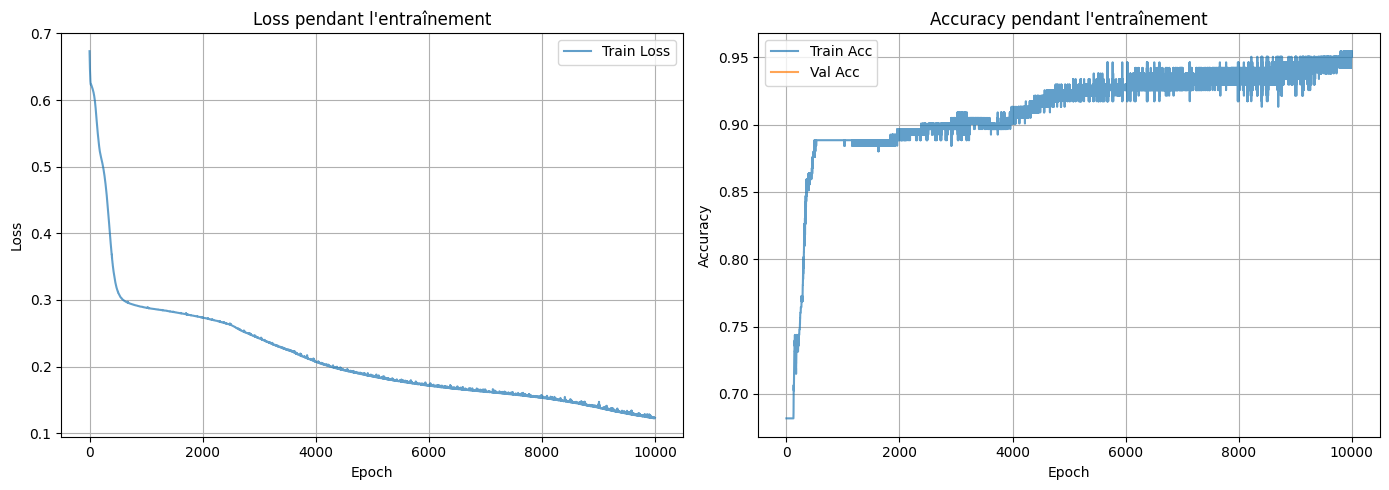


=== RÉSULTATS FINAUX ===

Confusion Matrix:
[[38 23]
 [ 0  0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77        61
         1.0       0.00      0.00      0.00         0

    accuracy                           0.62        61
   macro avg       0.50      0.31      0.38        61
weighted avg       1.00      0.62      0.77        61



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# 2. Boucle d'entraînement avec monitoring
model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(params=model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(10000):
    # === TRAINING ===
    model.train()
    optimizer.zero_grad()
    
    predict_train = model(X_train)
    loss_train = criterion(predict_train, Y_train)
    loss_train.backward()
    optimizer.step()
    
    # Calculer l'accuracy train
    with torch.no_grad():
        pred_class_train = (predict_train >= 0.5).float()
        acc_train = (pred_class_train == Y_train).float().mean().item()
    

    # Sauvegarder les métriques
    train_losses.append(loss_train.item())
    train_accs.append(acc_train)
    
    
    # Afficher tous les 500 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:')
        print(f'  Train - Loss: {loss_train.item():.4f}, Acc: {acc_train:.4f}')
        print()

# 3. Visualiser les courbes d'apprentissage
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss
ax1.plot(train_losses, label='Train Loss', alpha=0.7)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss pendant l\'entraînement')
ax1.legend()
ax1.grid(True)

# Accuracy
ax2.plot(train_accs, label='Train Acc', alpha=0.7)
ax2.plot(val_accs, label='Val Acc', alpha=0.7)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy pendant l\'entraînement')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# 4. Métriques détaillées à la fin
from sklearn.metrics import classification_report, confusion_matrix

model.eval()
with torch.no_grad():
    pred_test = model(X_test)
    pred_class_test = (pred_test >= 0.5).float()

Y_test = torch.Tensor(test_data['target'].values).reshape(-1, 1)

print("\n=== RÉSULTATS FINAUX ===")
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test.numpy(), pred_class_test.numpy()))
print("\nClassification Report:")
print(classification_report(Y_test.numpy(), pred_class_test.numpy()))

In [46]:
summary(model)

Layer (type:depth-idx)                   Param #
MLP                                      --
├─Linear: 1-1                            1,792
├─ReLU: 1-2                              --
├─Dropout: 1-3                           --
├─Linear: 1-4                            8,256
├─ReLU: 1-5                              --
├─Dropout: 1-6                           --
├─Linear: 1-7                            65
├─Sigmoid: 1-8                           --
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0

In [47]:
# 4. Métriques détaillées à la fin
from sklearn.metrics import classification_report, confusion_matrix

model.eval()
with torch.no_grad():
    pred_test = model(X_test)
    pred_class_test = (pred_test >= 0.5).float()
    acc_test = (pred_class_test == Y_test).float().mean().item()

print("acc_test :", np.round(acc_test * 100, 2), "%")

print("\n=== RÉSULTATS FINAUX ===")
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test.numpy(), pred_class_test.numpy()))
print("\nClassification Report:")
print(classification_report(Y_test.numpy(), pred_class_test.numpy()))

acc_test : 62.3 %

=== RÉSULTATS FINAUX ===

Confusion Matrix:
[[38 23]
 [ 0  0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77        61
         1.0       0.00      0.00      0.00         0

    accuracy                           0.62        61
   macro avg       0.50      0.31      0.38        61
weighted avg       1.00      0.62      0.77        61



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
